In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder

In [25]:
# 加载数据
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# 提取标签和诗歌文本
train_labels = train_data.iloc[:, 0]
train_poems = train_data.iloc[:, 1]
test_labels = test_data.iloc[:, 0]
test_poems = test_data.iloc[:, 1]

# 处理缺失值
train_poems = train_poems.fillna('')
test_poems = test_poems.fillna('')

# 你可以在应用TF-IDF之前对文本进行更多的预处理
def preprocess_text(text):
    # 例如小写化
    text = text.lower()
    # 去除标点符号
    text = re.sub(r'[^\w\s]', '', text)
    return text

train_poems = train_poems.apply(preprocess_text)
test_poems = test_poems.apply(preprocess_text)

In [26]:
# 标签编码
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [27]:
# 文本特征提取（TF-IDF）
tfidf_vectorizer = TfidfVectorizer(max_features=100000)  # 你可以调整max_features的值
train_tfidf = tfidf_vectorizer.fit_transform(train_poems)
test_tfidf = tfidf_vectorizer.transform(test_poems)

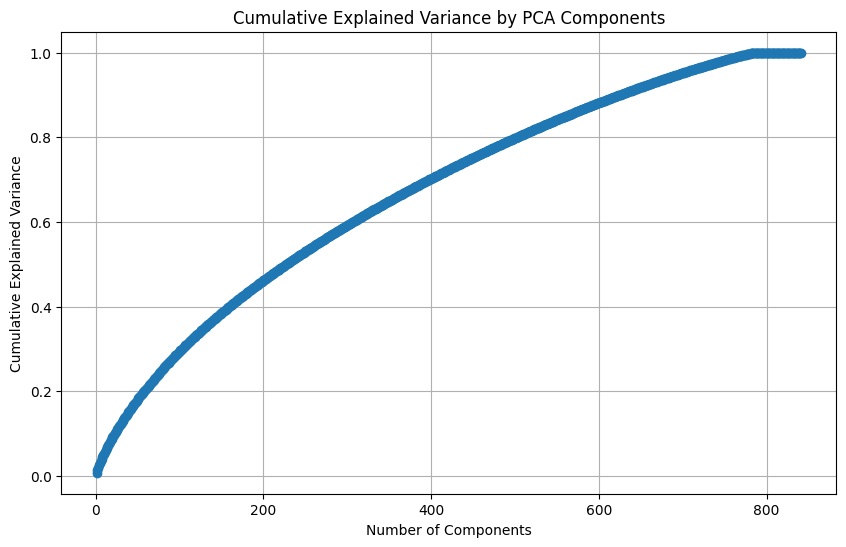

In [28]:
pca = PCA().fit(train_tfidf.toarray())
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# 绘制累计解释方差比图
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [29]:
def plot_2d(data, labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(loc='best')
    plt.show()

In [30]:
# 使用PCA
pca = PCA(n_components=700)  # 你可以调整n_components的值
train_pca = pca.fit_transform(train_tfidf.toarray())
test_pca = pca.transform(test_tfidf.toarray())

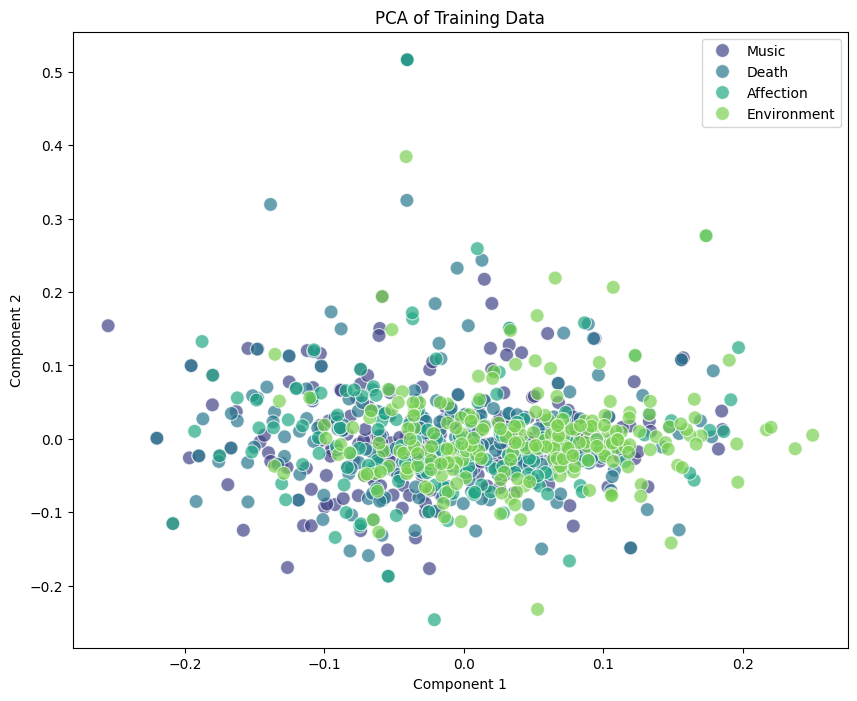

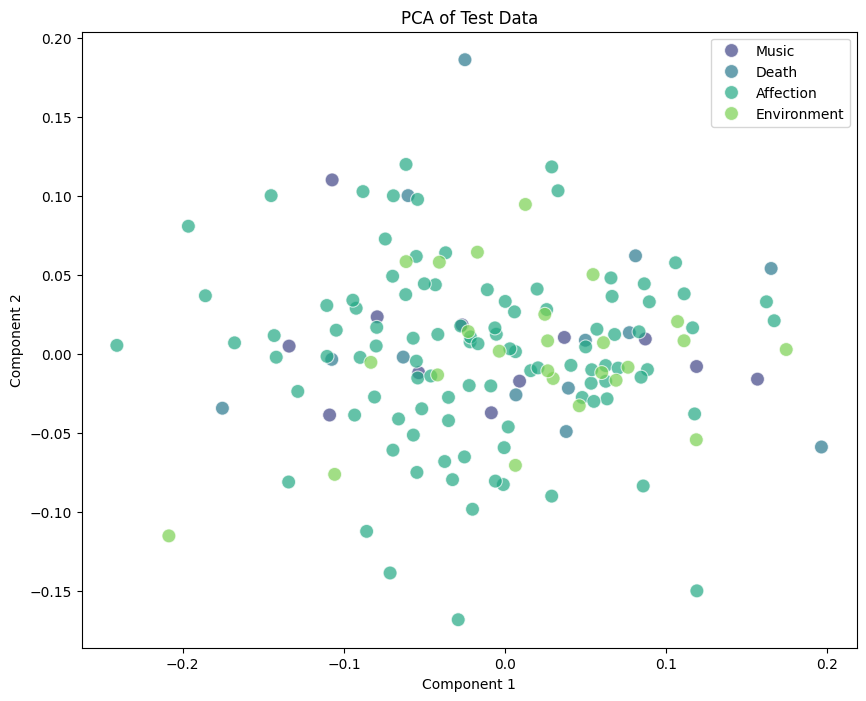

In [31]:
# 绘制训练数据的PCA结果
plot_2d(train_pca, train_labels, 'PCA of Training Data')

# 绘制测试数据的PCA结果
plot_2d(test_pca, test_labels, 'PCA of Test Data')


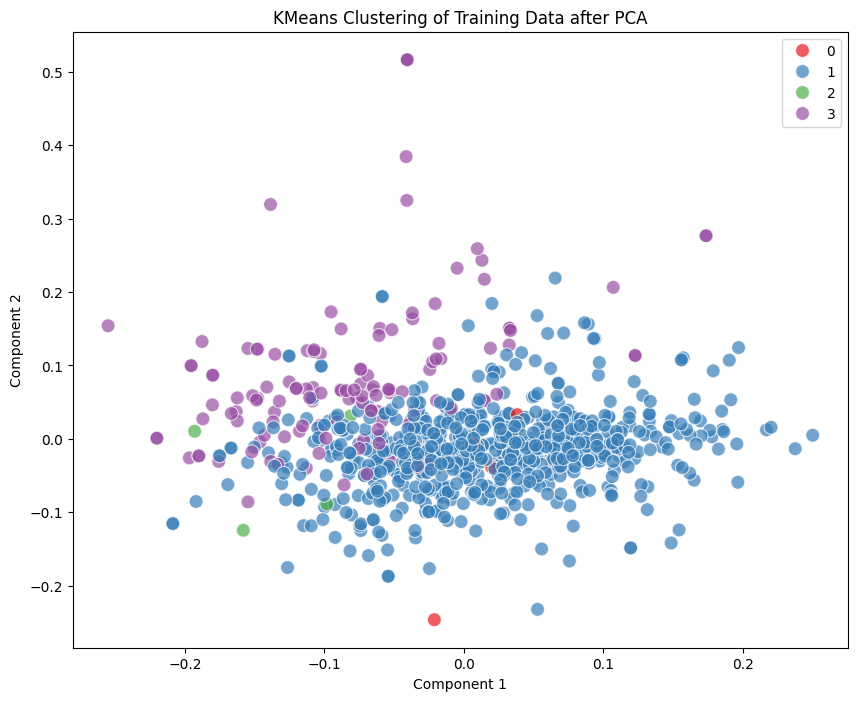

In [32]:
from sklearn.cluster import KMeans

# 假设你已经做了PCA降维，并且train_pca是PCA后的训练数据
# 设定你希望的聚类数量
kmeans = KMeans(n_clusters=4, random_state=42)  # 你可以根据具体情况调整聚类数量
train_clusters = kmeans.fit_predict(train_pca)

# 可视化KMeans聚类结果
def plot_2d_kmeans(data, labels, clusters, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.7)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(loc='best')
    plt.show()

# 绘制PCA后的KMeans聚类结果
plot_2d_kmeans(train_pca, train_labels, train_clusters, 'KMeans Clustering of Training Data after PCA')


In [16]:
# 或者使用SVD
svd = TruncatedSVD(n_components=100)  # 你可以调整n_components的值
train_svd = svd.fit_transform(train_tfidf)
test_svd = svd.transform(test_tfidf)

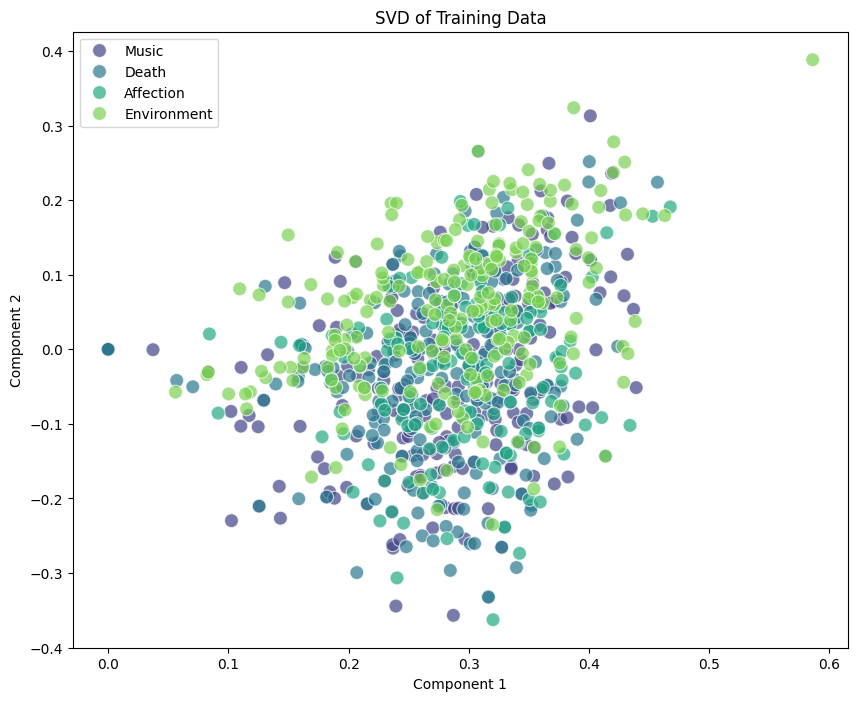

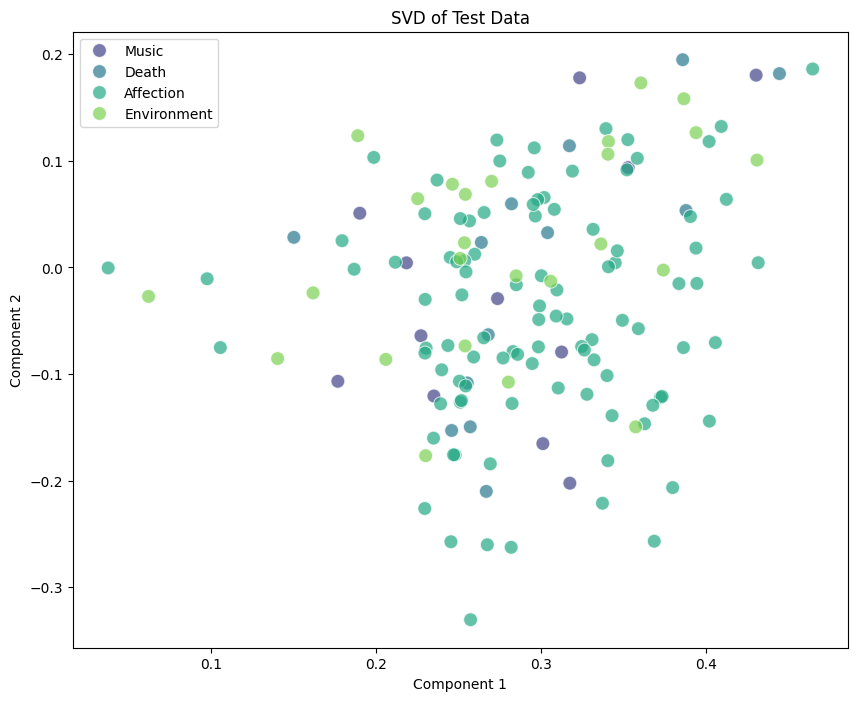

In [12]:
# 绘制训练数据的SVD结果
plot_2d(train_svd, train_labels, 'SVD of Training Data')

# 绘制测试数据的SVD结果
plot_2d(test_svd, test_labels, 'SVD of Test Data')